In [10]:
config_name = "debug_config.yaml"
from ansatze import (
    StronglyEntanglingLayers,
    OnlyRotationLayers,
    LocalTwoDesign,
    BackwardsLightCone,
)
from reuploadingmodel import ReuploadingModel
from resultssaver import ResultsSaver
from collections import Counter
import dask
from encoding_gates import RX
from epsilon_utils import *
from functools import partial
from functools import wraps
import hydra
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from itertools import combinations
from math import pi
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.markers import MarkerStyle
import matplotlib.patches as patches
from omegaconf import DictConfig, OmegaConf
import os
from pennylane.fourier import coefficients, circuit_spectrum
import pennylane as qml
import pennylane.fourier.visualize as vis
import pickle
import numpy as np
import matplotlib
from redundancies import cumulative_redundancies
import seaborn as sns

from statisticsreuploading import (
    SimulationStatisticsCoefficients,
    TheoreticalStatisticsCoefficients,
)
from resultsvisualization import ResultsVisualization
import torch
from tqdm import tqdm
from typing import Optional, Union
import warnings

In [11]:
model = ReuploadingModel(
                    dev="default.qubit",
                    encoding="pauli_encoding",
                    diff_generator_per_layer=False,
                    ansatz="StronglyEntangling",    
                    cost="global",
                    qubit_measured=0,
                    n_qubits=4,
                    n_samples=3000,
                    n_encoding_qubits=4,
                    n_circuit_layers=1, # must be different from 0 --> TODO: raise errors in reuploadingmodel
                    n_periodic_layers=5,
                    m_subgroups=1,
                    sub_l=1, # must be different from 0
                    m_wires=1,
                ) # If an argument is not taken into account in the ansatz or measurement strategy, it is not used
simu = SimulationStatisticsCoefficients(model)
theo = TheoreticalStatisticsCoefficients(model,bool_calculate_epsilon=False,)
plots = ResultsVisualization(model,simu, theo)
ResultsSaver(model, simu, theo).save_variables()

Calculating Coefficients:   0%|          |

/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/statisticsreuploading.py:92: RuntimeWarning: Epsilon not calculated. Using maximum value of 2^(2n)
  warnings.warn(


In [12]:
model.circuit_diagram()

0: ──Rot─╭●───────╭X──Rot─╭●────╭X──Rot──────╭●─╭X──Rot──────╭●─────────╭X──Rot─╭●────╭X──RX(0.10,"s_0")──Rot─────────────────╭●───────╭X──Rot─╭●────╭X──Rot──────╭●─╭X──Rot──────╭●─────────╭X──Rot─╭●────╭X────┤ ╭Probs
1: ──Rot─╰X─╭●────│───Rot─│──╭●─│──╭X────Rot─│──╰●─╭X────Rot─╰X───╭●────│───Rot─│──╭●─│──╭X───────────────RX(0.10,"s_0")──Rot─╰X─╭●────│───Rot─│──╭●─│──╭X────Rot─│──╰●─╭X────Rot─╰X───╭●────│───Rot─│──╭●─│──╭X─┤ ├Probs
2: ──Rot────╰X─╭●─│───Rot─╰X─│──╰●─│─────Rot─│─────╰●───╭X────Rot─╰X─╭●─│───Rot─╰X─│──╰●─│────────────────RX(0.10,"s_0")──Rot────╰X─╭●─│───Rot─╰X─│──╰●─│─────Rot─│─────╰●───╭X────Rot─╰X─╭●─│───Rot─╰X─│──╰●─│──┤ ├Probs
3: ──Rot───────╰X─╰●──Rot────╰X────╰●────Rot─╰X─────────╰●────Rot────╰X─╰●──Rot────╰X────╰●───────────────RX(0.10,"s_0")──Rot───────╰X─╰●──Rot────╰X────╰●────Rot─╰X─────────╰●────Rot────╰X─╰●──Rot────╰X────╰●─┤ ╰Probs


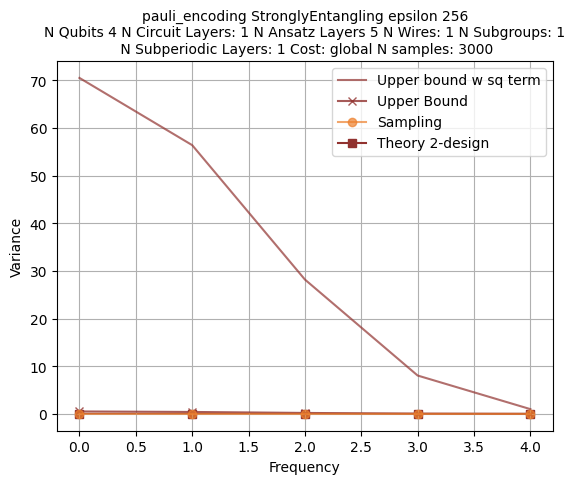

In [13]:
plots.plot_var_abs_coeffs_bounds()